In [1]:
import wandb
import matplotlib.pyplot as plt
import pandas as pd

# Download data from wandb

This notebook shows how to download the results of the experiments from wandb. This can be useful when we have finished to run the experiments and we need to make plots using  matplotlib because we have to put the plots in a paper or in a report.

To download the data and plot them, we need to know the link of the run on wandb (each run has a unique id) and the name of the project.
Then, we have to create a run object using the function `api.run()` and passing the link of the run as argument. 
Finally, we can download data, there are two options:
- Download the data using the function `run.history()`: this function returns a list of dictionaries, each dictionary contains the data of a single step of the experiment. If you pass pandas=True as argument, the function returns a pandas dataframe. Calling this function the history records will be sampled
- The alternative solution is to use `run.scan_history()`: in this case you will download all the values logged during the experiment. I prefer this one and I usually use it. You can convert the data to a pandas dataframe using the function `pd.DataFrame()`.

Note that it is possible to find NaN values inside the data that you download. This happens because when you log something on wandb you will add a new value for each of the possible nmetrics you already logged. For instance, if you run the loss and the accuracy you'll have two values for each time that you log on wandb. However, if you log the accuracy at the end of each epoch and the loss at the end of each batch, you'll have a lot of NaN values in the accuracy column.

In [2]:
def get_df(api_link):
    # Download the data of the api_link run and return it as a pandas dataframe
    api = wandb.Api()
    run = api.run(api_link)
    df = pd.DataFrame(run.scan_history())
    return df

In [3]:
df = get_df("/lucacorbucci/wandb-quick-intro/runs/v36iry61")

In [4]:
df.head(10)

,train_loss,step,epoch,train_accuracy,_runtime,test_accuracy,_step,test_predictions,_timestamp
0,2.331987,0.0,NaN,NaN,380.421491,NaN,0,None,1.708598e+09
1,2.025143,0.0,NaN,NaN,380.433794,NaN,1,None,1.708598e+09
2,2.139769,0.0,NaN,NaN,380.444561,NaN,2,None,1.708598e+09
3,1.863159,0.0,NaN,NaN,380.454561,NaN,3,None,1.708598e+09
4,1.364626,0.0,NaN,NaN,380.464803,NaN,4,None,1.708598e+09
5,1.444305,0.0,NaN,NaN,380.474688,NaN,5,None,1.708598e+09
6,1.366549,0.0,NaN,NaN,380.484471,NaN,6,None,1.708598e+09
7,1.150485,0.0,NaN,NaN,380.494200,NaN,7,None,1.708598e+09
8,0.970323,0.0,NaN,NaN,380.505937,NaN,8,None,1.708598e+09
9,0.964210,0.0,NaN,NaN,380.515760,NaN,9,None,1.708598e+09


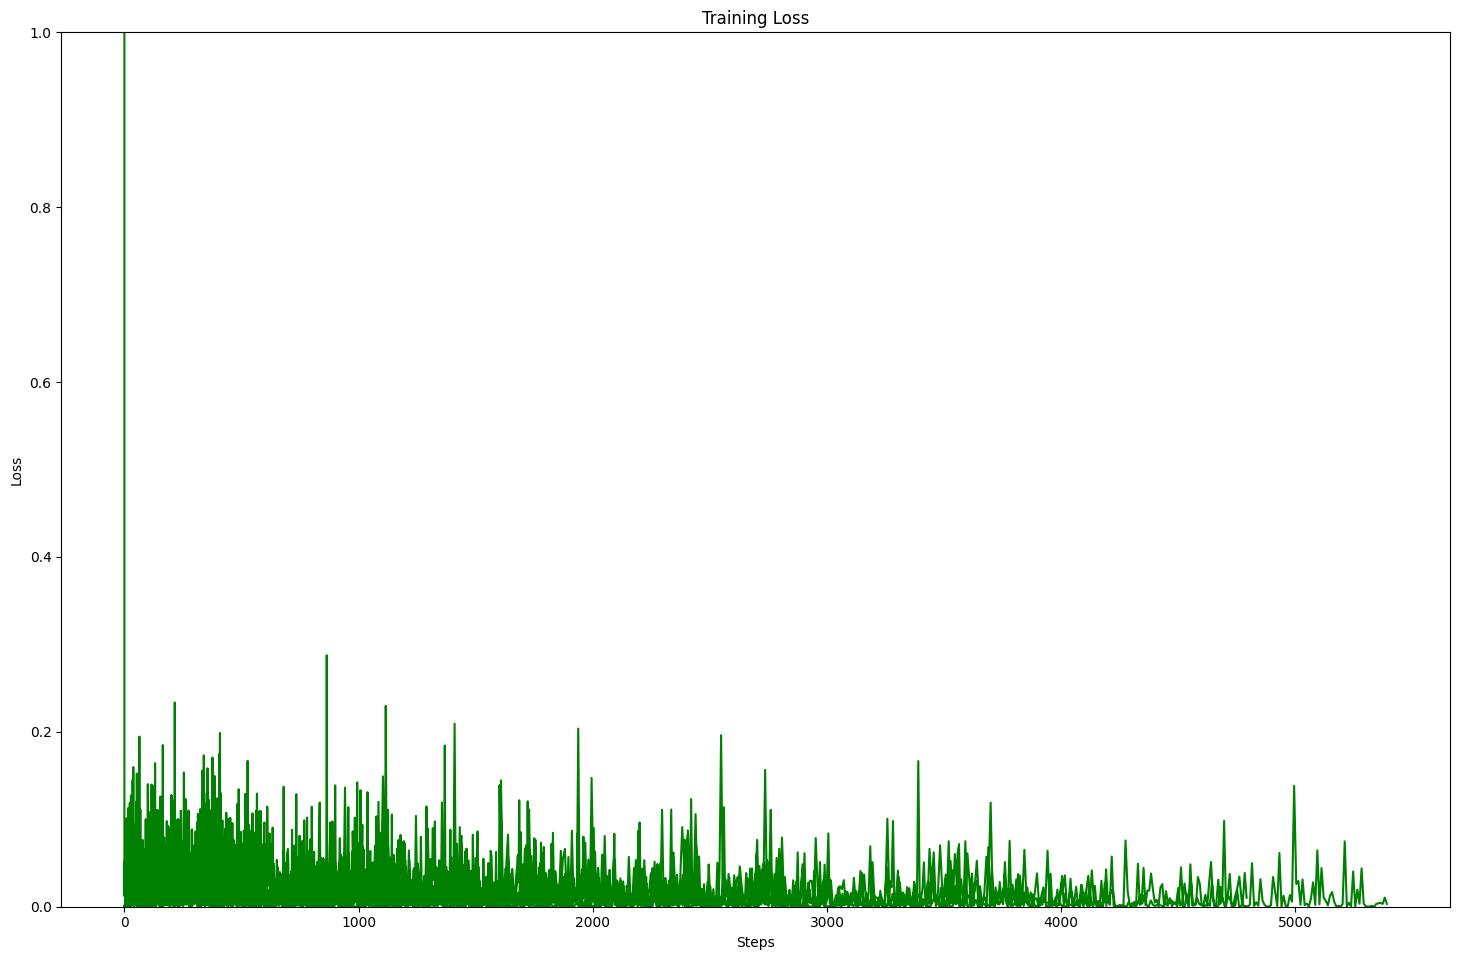

In [5]:
# Now we want to plot the loss
plt.figure(figsize=(15, 10))
plt.plot(
        df["step"],
        df["train_loss"],
        label="Training Loss",
        color="green",
    )
plt.title("Training Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.rcParams.update({"font.size": 20})
plt.ylim(0, 1)
plt.tight_layout()
plt.show()